In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df=pd.read_csv("D:\\ML\\datasets\\wine_dataset.csv",skiprows=1,header=None,usecols=[0,1,2])
df.columns=['Class Label','Alcohol','Malic Acid']

In [19]:
df = df[:200]

In [20]:
df.shape

(200, 3)

In [21]:
df.head()

,Class Label,Alcohol,Malic Acid
0,7.4,0.70,0.00
1,7.8,0.88,0.00
2,7.8,0.76,0.04
3,11.2,0.28,0.56
4,7.4,0.70,0.00


In [16]:
df.drop(0,inplace=True)

In [17]:
df.head()

,Class Label,Alcohol,Malic Acid
1,7.4,0.7,0
2,7.8,0.88,0
3,7.8,0.76,0.04
4,11.2,0.28,0.56
5,7.4,0.7,0


<Axes: xlabel='Alcohol', ylabel='Density'>

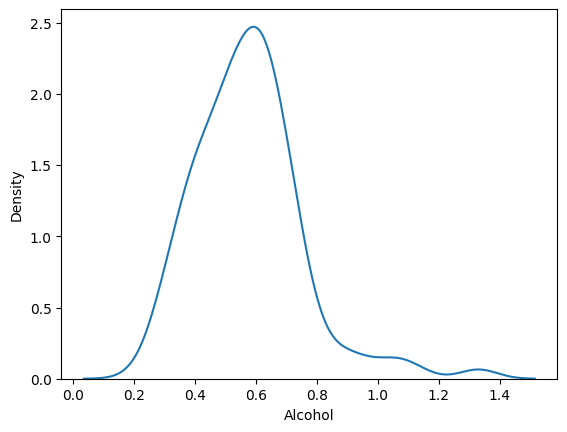

In [22]:
sns.kdeplot(x=df['Alcohol'])

<Axes: xlabel='Alcohol', ylabel='Count'>

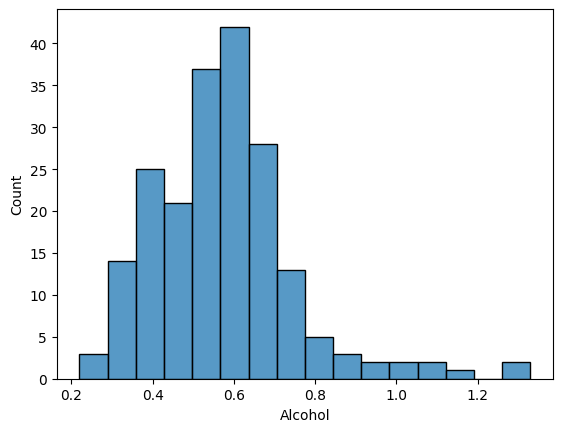

In [23]:
# sns.distplot(df['Alcohol'],hist=False)
sns.histplot(x=df['Alcohol'])

<Axes: xlabel='Malic Acid', ylabel='Count'>

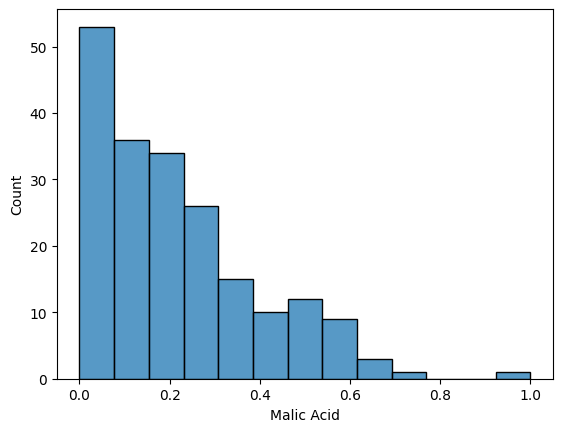

In [24]:
sns.histplot(x=df['Malic Acid'])

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

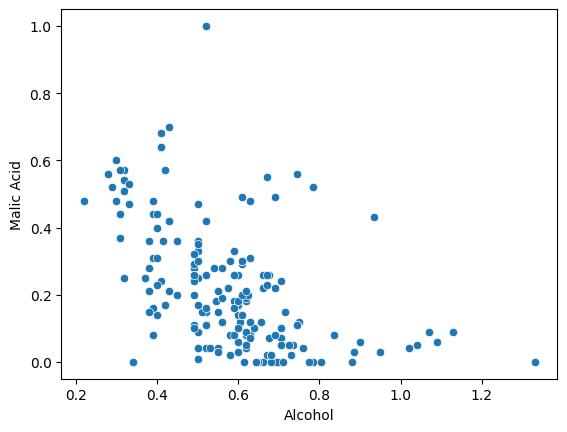

In [25]:
sns.scatterplot(x=df['Alcohol'],y=df['Malic Acid'])

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class Label', axis=1),
                                                    df['Class Label'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((140, 2), (60, 2))

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [29]:
np.round(X_train.describe(), 1)


,Alcohol,Malic Acid
count,140.0,140.0
mean,0.6,0.2
std,0.2,0.2
min,0.2,0.0
25%,0.5,0.1
50%,0.6,0.2
75%,0.7,0.3
max,1.3,1.0


In [30]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic Acid
count,140.0,140.0
mean,0.3,0.2
std,0.2,0.2
min,0.0,0.0
25%,0.2,0.1
50%,0.3,0.2
75%,0.4,0.3
max,1.0,1.0


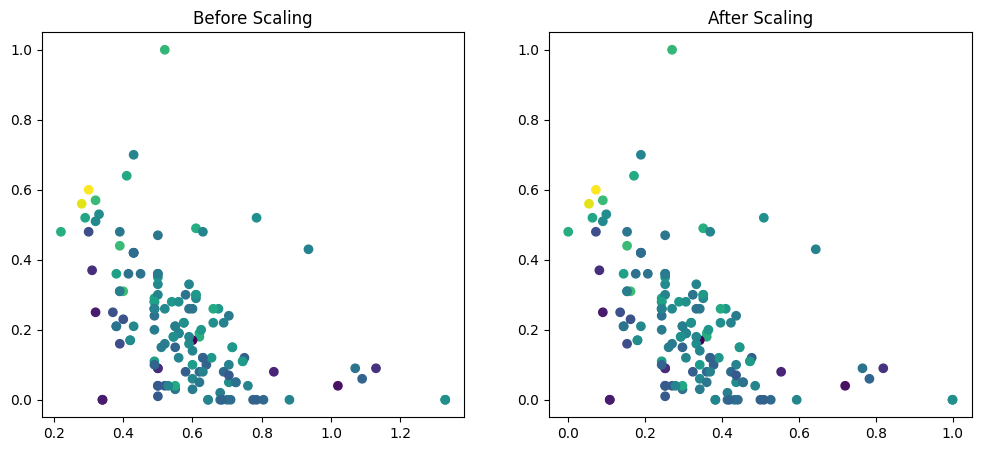

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic Acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic Acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

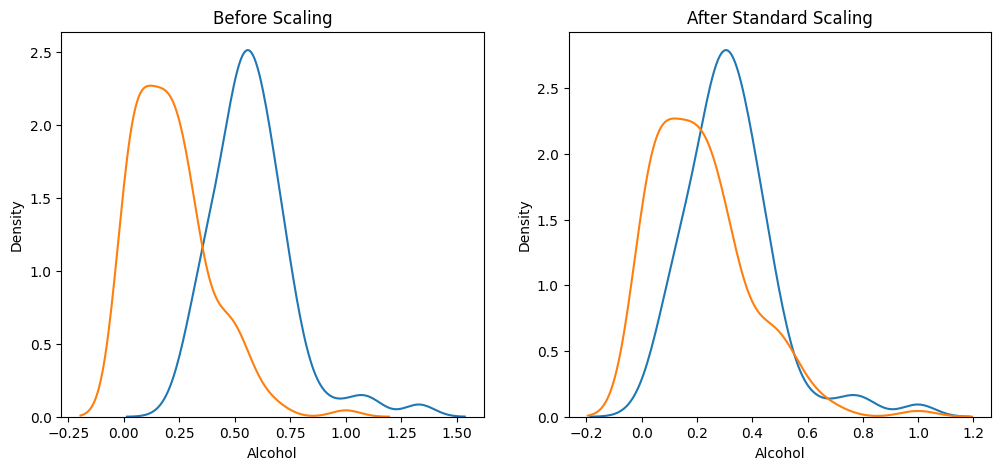

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic Acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic Acid'], ax=ax2)
plt.show()

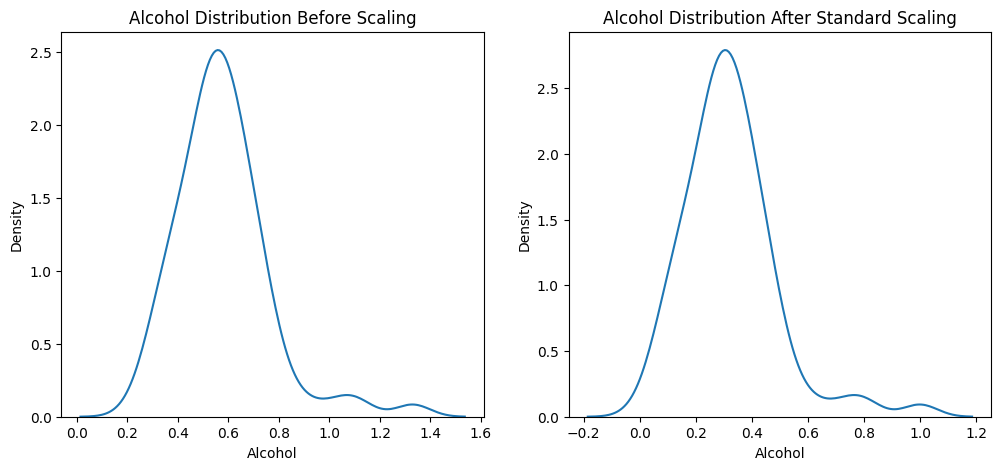

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

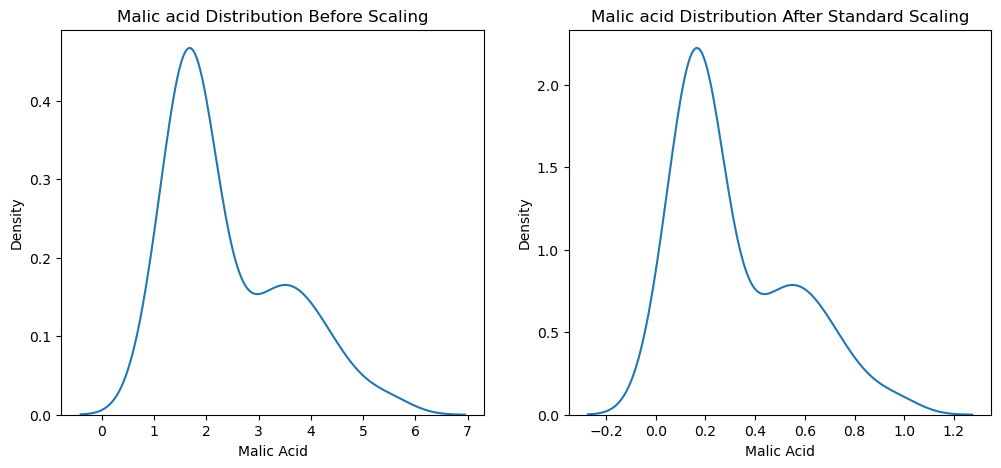

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic Acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic Acid'], ax=ax2)
plt.show()